# Support Vector Regression (SVR)

## Importing the libraries

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [29]:
dataset = pd.read_csv('/content/drive/My Drive/ML:a-z/SVR/Position_Salaries.csv')
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [30]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [31]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [32]:
y=y.reshape(len(y),1) #reshaping into 2d array because standard scaling function expects a 2d array

## Feature Scaling

We need feature scaling in SVR because it is very sensitive to error distances.
In general, algorithms that deal with distances and similarities are sensitive to feature transformations, so its a good idea to feature scale them.

In [33]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()

sc_y=StandardScaler() #different model to fit for y
x=sc_x.fit_transform(x)
y=sc_y.fit_transform(y)

In [34]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [35]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [36]:
from sklearn.svm import SVR
svr_reg=SVR(kernel='rbf') #kernels
svr_reg.fit(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result
We have to inverse the tranformation after prediction as the result will be in the form that we got for y after feature scaling.

In [39]:
#inverse_transform is used to inverse the feature scaling transformation used earlier and it shld be sc_y as it the target variable
sc_y.inverse_transform(svr_reg.predict(sc_x.transform([[6.5]]))) #we shld input in the same format as training data so applying the same scaler i.e sc_x and it shld be a 2d array

array([170370.0204065])

## Visualising the SVR results

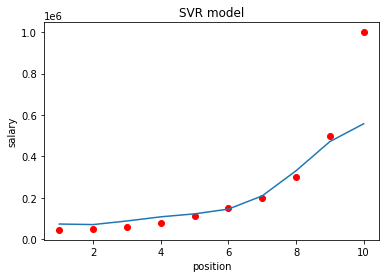

In [44]:
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y),color='red')
plt.plot(sc_x.inverse_transform(x),sc_y.inverse_transform(svr_reg.predict(x)))
plt.xlabel('position')
plt.ylabel('salary')
plt.title('SVR model')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

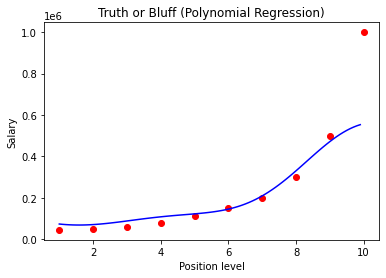

In [56]:
X_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(svr_reg.predict(sc_x.transform(X_grid))), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()